Importing libraries

In [1]:
import numpy as np
import sympy as sp
import os
from queue import PriorityQueue
import matplotlib.pyplot as mp

Note: workspace is a rectangle of width b = 400 mm and height h = 250 mm

Variables:
C2C
C2G
closed_list
open _list
initial_node
goal_node
obstacle_space usign matrix and geometric equations
action_set --> N(1),S(1), E(1), W(1), NE(1.5), NW, SE, SW



Data set for each node (can be changed)

Creating the workspace with all default values as once

In [2]:

#node size ratio (unit/node)
def map():
    global x_size, y_size, map_def, Rat
    Rat = 1 #unit per node
    x_size = int(400/Rat)
    y_size = int(250/Rat)
    map_def = np.zeros(x_size*y_size)
    map_def = np.reshape(map_def,(y_size,x_size))
    map_def[:,:] = -2

Defining obstacle space

Correct the equations

Circle

In [3]:
#x is colum and y is row
def circle_obs():
    global x_c, y_c, x_nc, y_nc, map_obs1, listofallpointsformap
    x_c = []
    y_c = []
    x_nc = []
    y_nc = []
    y_centre = int((249 - 65)/Rat)
    x_centre = int((399 - 100)/Rat)
    radius_c = int(45/Rat)
    radius = int(40/Rat)
    map_obs1 = np.copy(map_def)
    for x in range(int(250/Rat),int(350/Rat)):
        for y in range(int(125/Rat), int(235/Rat)):
            if (np.sqrt((x-x_centre)**2 + (y-y_centre)**2)) < radius_c:
                map_obs1[y, x] = -1
                x_c.append(x)
                y_c.append(y)
                listofallpointsformap.append([x,y])
            if (np.sqrt((x-x_centre)**2 + (y-y_centre)**2)) < radius:
                x_nc.append(x)
                y_nc.append(y)


Triangles

In [4]:
def triang_obs():
    global x_t1, y_t1, x_t1_nc, y_t1_nc, map_obs2, x_t2_nc, y_t2_nc, x_t2, y_t2, listofallpointsformap
    y1 = sp.symbols('y1')
    x1 = sp.symbols('x1')
    y2 = sp.symbols('y2')
    x2 = sp.symbols('x2')
    y3 = sp.symbols('y3')
    x3 = sp.symbols('x3')
    y4 = sp.symbols('y4')
    x4 = sp.symbols('x4')
    y5 = sp.symbols('y5')
    x5 = sp.symbols('x5')

    e1 = y1 - (-5/54)*x1 - 187.87
    e1_nc = y1 - (-1/9)*x1 - 1700/9
    e2 = y2 - (-90/74)*x2 - 222.7
    e2_nc = y2 - (-85/69)*x2 - 15671/69
    e3 = y3 - (-85/20)*x3 - 541.25
    e3_nc = y3 - (-16/5)*x3 - 2159/5
    e4 = y4 -x4 -95
    e4_nc = y4 - (6/7)*x4 - 779/7
    e5 = y5 - (30/89)*x5 - 174.5
    e5_nc = y5 - (25/79)*x5 - 13661/79
    x_t1 = []
    y_t1 = []
    x_t2 = []
    y_t2 = []
    x_t1_nc = []
    y_t1_nc = []
    x_t2_nc = []
    y_t2_nc = []
    map_obs2 = np.copy(map_obs1)
    for x in range(int(140/Rat)):
        for y in range(int(80/Rat),int(220/Rat)):
            if e1.subs([(x1,x),(y1,y)])<=0 and e2.subs([(x2,x),(y2,y)])>=0 and e3.subs([(x3,x),(y3,y)])<=0 :
                map_obs2[y,x] = -1
                x_t1.append(x)
                y_t1.append(y)
                listofallpointsformap.append([x,y])
            if e1_nc.subs([(x1,x),(y1,y)])<=0 and e2_nc.subs([(x2,x),(y2,y)])>=0 and e3_nc.subs([(x3,x),(y3,y)])<=0 :
                x_t1_nc.append(x)
                y_t1_nc.append(y)
            if e1.subs([(x1,x),(y1,y)])>=0 and e4.subs([(x4,x),(y4,y)])>=0 and e5.subs([(x5,x),(y5,y)])<=0:
                map_obs2[y,x] = -1
                x_t2.append(x)
                y_t2.append(y)
                listofallpointsformap.append([x,y])
            if e1_nc.subs([(x1,x),(y1,y)])>=0 and e4_nc.subs([(x4,x),(y4,y)])>=0 and e5_nc.subs([(x5,x),(y5,y)])<=0:
                x_t2_nc.append(x)
                y_t2_nc.append(y)


Chekc the clearance again

Hexagon

In [5]:
def hex_obs():
    global map_obs4, x_h, y_h, x_h_nc, y_h_nc, listofallpointsformap
    y6 = sp.symbols('y6')
    x6 = sp.symbols('x6')
    y7 = sp.symbols('y7')
    x7 = sp.symbols('x7')
    y8 = sp.symbols('y8')
    x8 = sp.symbols('x8')
    y9 = sp.symbols('y9')
    x9 = sp.symbols('x9')
    x10 = sp.symbols('x10')
    x11 = sp.symbols('x11')

    e6 = y6 - (5/8)*x6 + 71
    e6_nc = y6 - (4/7)*x6 + 380/7
    e10 = x10 - 239
    e10_nc = x10 - 234
    e7 = y7 + (5/8)*x7 - 271
    e7_nc = y7 + (4/7)*x7 - 1780/7
    e8 = y8 - (5/8)*x8 - 21
    e8_nc = y8 - (4/7)*x8 - 180/7
    e11 = x11 - 160
    e11_nc = x11 - 164
    e9 = y9 + (5/8)*x9 - 179
    e9_nc = y9 + (4/7)*x9 - 1220/7
    x_h = []
    y_h = []
    x_h_nc = []
    y_h_nc = []
    map_obs4 = np.copy(map_obs2)
    for x in range(int(150/Rat), int(250/Rat)):
        for y in range(int(50/Rat),int(155/Rat)):
            if e6.subs([(x6,x),(y6,y)])>=0 and e7.subs([(x7,x),(y7,y)])<=0 and e8.subs([(x8,x),(y8,y)])<=0 and e9.subs([(x9,x),(y9,y)])>=0 and e10.subs([(x10,x)])<=0 and e11.subs([(x11,x)])>=0:
                map_obs4[y,x] = -1
                x_h.append(x)
                y_h.append(y)
                listofallpointsformap.append([x,y])
            if e6_nc.subs([(x6,x),(y6,y)])>=0 and e7_nc.subs([(x7,x),(y7,y)])<=0 and e8_nc.subs([(x8,x),(y8,y)])<=0 and e9_nc.subs([(x9,x),(y9,y)])>=0 and e10_nc.subs([(x10,x)])<=0 and e11_nc.subs([(x11,x)])>=0:
                x_h_nc.append(x)
                y_h_nc.append(y)


The main algorithm

Data structure

In [6]:
class Node:
    def __init__(self, node_id, node_loc, parent_id, cost):
        self.parent_id = parent_id #
        self.node_id = node_id #unique node id for each node
        self.node_loc = node_loc
        self.cost = round(cost,1)

Creating required list for storing node information

Initialize the goal node

Remember x is column and y is rows, a is row and b is column

2) Update the value at the matrix space to node id itself when visited

moving north

Getting the node to be explored from Open list

In [7]:
def pop(Cl_list, Op_list, Al_list):
    dat = Op_list.get()
    Cl_list.append(All_list[dat[1]-1])
    return Al_list[dat[1]-1], dat[0]
#node = pop(Closed_list, Open_list)

Cost Dictionary

In [8]:
cost_direction = {'S': 1, 'D': 1.4}

Parameter update

In [9]:
def param(All_list, Open_list, map_obs4, cost_dir, c, d, node):
     id = All_list[-1].node_id + 1
     map_obs4[c,d] = id
     cost = node.cost + cost_dir #cost_dir is a dictionary
     
     parent = node.node_id
     loc = [c, d]
     # print('node at id', id, 'cost is', cost, 'loc', loc)
     All_list.append(Node(id, loc, parent, cost))
     tup_new = [cost, id]
     Open_list.put(tup_new)

List cost update function

In [10]:
def cost_update(nod, c ,d, All_list,  Closed_list, Open_list, map_obs4, cost_dir):
     index = int(map_obs4[c, d])
     if round((nod.cost + cost_dir),1)< round(All_list[index-1].cost,1): #since index/node_id is starting from 1
            All_list[index-1].cost = round((nod.cost + cost_dir),1)
            All_list[index-1].parent_id = nod.node_id
            # print('updated cost of node', index, 'is', All_list[index-1].cost)
            for i in Closed_list:
                if i.node_id ==index:
                        i.cost = round((nod.cost + cost_dir),1)
                        i.parent_id = nod.node_id
            if Open_list.qsize() > 0:
                for j in Open_list.queue:
                    if j[1] ==index:
                            j[0] = round((nod.cost + cost_dir),1)
                            # i.parent_id = nod.node_id  

Check if goal function

In [11]:

def check_if_goal(goal_loc, A_list, go_cost):
    # print('checking goal')
    if goal_loc==A_list[-1].node_loc:
        go_cost = A_list[-1].cost #updates the goal cost
        print('goal cost is', go_cost)
        return go_cost
    else:
        return None


In [12]:
#dat = open_list.get() , get the data from the priority queue
# node = dat[1]
def move_north(node, All_list, Open_list, go_co): #change the list names
    a,b = 0,0
    a, b = node.node_loc
    if a < 249:
        # print('going north')
        c = a+1
        d = b
        if map_obs4[c,d]== -2:
        #creating new node with new parameters
        #make a function
            param(All_list, Open_list, map_obs4, cost_direction['S'], c, d, node)
            # print([a,b], 'to')
            # print(All_list[-1].node_loc)
            
            return check_if_goal(goal_location, All_list, go_co)
        
        elif map_obs4[c,d]==-1:
            # print('Obstacle space')
            return None
        
        else:
            cost_update(node, c ,d, All_list,  Closed_list, Open_list, map_obs4, cost_direction['S'])  
            return None

moving east

In [13]:
def move_east(node, All_list, Open_list, go_co):
    a,b = 0,0
    a, b = node.node_loc
    if b < 399:
        c = a
        d = b+1
        if map_obs4[c, d]== -2:
        #creating new node with new parameters
        #make a function
            # print('Easting')
            param(All_list, Open_list, map_obs4, cost_direction['S'], c, d, node)
            # print([a,b], 'to')
            # print(All_list[-1].node_loc)
            
            return check_if_goal(goal_location, All_list, go_co)
        
        elif map_obs4[c,d]==-1:
            # print('We are near obstacle space')
            return None
        
        else:
            cost_update(node, c ,d, All_list,  Closed_list, Open_list, map_obs4, cost_direction['S'])
            return None

moving west

In [14]:
def move_west(node, All_list, Open_list, go_co):
    a,b = 0,0
    a, b = node.node_loc
    if b > 0:
        c = a
        d = b-1
        if map_obs4[c,d]== -2:
        #creating new node with new parameters
        #make a function
            # print('westing')
            param(All_list, Open_list, map_obs4, cost_direction['S'], c, d, node)
            # print([a,b], 'to')
            # print(All_list[-1].node_loc)
            
            return check_if_goal(goal_location, All_list, go_co) 

        elif map_obs4[c,d]==-1:
            # print('We are near obstacle space')
            return None
        
        else:
            cost_update(node, c ,d, All_list,  Closed_list, Open_list, map_obs4, cost_direction['S'])
            return None

moving south

In [15]:
def move_south(node, All_list, Open_list, go_co):
    a,b = 0,0
    a, b = node.node_loc
    if a > 0:
        c = a-1
        d = b
        if map_obs4[c,d]== -2:
        #creating new node with new parameters
        #make a function
            # print('southing')
            param(All_list, Open_list, map_obs4, cost_direction['S'], c, d, node)
            # print([a,b], 'to')
            # print(All_list[-1].node_loc)
            
            return check_if_goal(goal_location, All_list, go_co)
        
        elif map_obs4[c,d]==-1:
            # print('Obstacle space')
            return None
        
        else:
            cost_update(node, c ,d, All_list,  Closed_list, Open_list, map_obs4, cost_direction['S'])
            return None

Moving north east

In [16]:
def move_north_east(node, All_list, Open_list, go_co):
    a,b = 0,0
    a, b = node.node_loc
    if a < 249 and b <399:
        c = a + 1
        d = b + 1
        if map_obs4[c,d]== -2:
        #creating new node with new parameters
        #make a function
            # print('north_easting')
            param(All_list, Open_list, map_obs4, cost_direction['D'],c, d, node)
            # print([a,b], 'to')
            # print(All_list[-1].node_loc)
            
            return check_if_goal(goal_location, All_list, go_co)
        
        elif map_obs4[c,d]==-1:
            # print('Obstacle space')
            return None
        
        else:
            cost_update(node, c ,d, All_list,  Closed_list, Open_list, map_obs4, cost_direction['D'])
            return None

Northwest

In [17]:
def move_north_west(node, All_list, Open_list, go_co):
    a,b = 0,0
    a, b = node.node_loc
    if a < 249 and b >0:
        c = a + 1
        d = b - 1
        if map_obs4[c,d]== -2:
        #creating new node with new parameters
        #make a function
            # print('north_westing')
            param(All_list, Open_list, map_obs4, cost_direction['D'],c, d, node)
            # print([a,b], 'to')
            # print(All_list[-1].node_loc)
            # check_if_goal(goal_location, All_list, goal_cost)
            return check_if_goal(goal_location, All_list, go_co)
        
        elif map_obs4[c,d]==-1:
            # print('Obstacle space')
            return None
        
        else:
            cost_update(node, c ,d, All_list,  Closed_list, Open_list, map_obs4, cost_direction['D'])
            return None

Southwest

In [18]:
def move_south_west(node, All_list, Open_list, go_co):
    a,b = 0,0
    a, b = node.node_loc
    if a > 0 and b >0:
        c = a - 1
        d = b - 1
        if map_obs4[c,d]== -2:
        #creating new node with new parameters
        #make a function
            # print('south_westing')
            param(All_list, Open_list, map_obs4, cost_direction['D'],c, d, node)
            # print([a,b], 'to')
            # print(All_list[-1].node_loc)
            # check_if_goal(goal_location, All_list, goal_cost)
            return check_if_goal(goal_location, All_list, go_co)
        
        elif map_obs4[c,d]==-1:
            # print('Obstacle space')
            return None
        
        else:
            cost_update(node, c ,d, All_list,  Closed_list, Open_list, map_obs4, cost_direction['D'])
            return None

Southeast

In [19]:
def move_south_east(node, All_list, Open_list, go_co):
    a,b = 0,0
    a, b = node.node_loc
    if a >0 and b <399:
        c = a - 1
        d = b + 1
        if map_obs4[c,d]== -2:
        #creating new node with new parameters
        #make a function
            # print('south_easting')
            param(All_list, Open_list, map_obs4, cost_direction['D'], c, d, node)
            # print([a,b], 'to')
            # print(All_list[-1].node_loc)
            # check_if_goal(goal_location, All_list, goal_cost)
            return check_if_goal(goal_location, All_list, go_co)
        
        elif map_obs4[c,d]==-1:
            # print('Obstacle space')
            return None
        
        else:
            cost_update(node, c ,d, All_list,  Closed_list, Open_list, map_obs4, cost_direction['D'])
            return None

In [20]:
def movement(node, All_list, Open_list, go_co):
    go_co = None
    if (move_north(node, All_list, Open_list, go_co))!=None:
        go_co = All_list[-1].cost
        # print('aya tha', go_co)
    if (move_west(node, All_list, Open_list, go_co))!=None:
        go_co = All_list[-1].cost
        # print('aya tha', go_co)
    if (move_south(node, All_list, Open_list, go_co))!=None:
        go_co = All_list[-1].cost
        # print('aya tha', go_co)
    if (move_east(node, All_list, Open_list, go_co))!=None:
        go_co = All_list[-1].cost
        # print('aya tha', go_co)
    if (move_north_east(node, All_list, Open_list, go_co))!=None:
        go_co = All_list[-1].cost
        # print('aya tha', go_co)
    if (move_north_west(node, All_list, Open_list, go_co))!=None:
        go_co = All_list[-1].cost
        # print('aya tha', go_co)
    if (move_south_east(node, All_list, Open_list, go_co))!=None:
        go_co = All_list[-1].cost
        # print('aya tha', go_co)
    if (move_south_west(node, All_list, Open_list, go_co))!=None:
        go_co = All_list[-1].cost        
        # print('aya tha', go_co)
    


    return go_co
      
   
    

In [21]:
def backtrack(A_list, x, y):
    ind = int(map_obs4[goal_location[0], goal_location[1]])
    x.append(A_list[ind-1].node_loc[0])
    y.append(A_list[ind-1].node_loc[1])
    id = A_list[ind-1].parent_id
    while(id>0):
        x.append(A_list[id-1].node_loc[0])
        y.append(A_list[id-1].node_loc[1])
        id = A_list[id - 1].parent_id


In [22]:
def initial():
    global All_list, Closed_list, goal_location, Open_list, listofallpointsformap
    listofallpointsformap = []
    All_list = []
    Closed_list = []
    first_node_id = 1
    start_cords_x = int(input("please enter the starting x coordinate: "))
    start_cords_y = int(input("please enter the starting x coordinate: "))
    if start_cords_x<1 or start_cords_x>400 or start_cords_y<1 or start_cords_y>400:
        print("Either wrong input or the start node is in obstacle space")
        exit(0)
    else:
        node_loc = [start_cords_y-1, start_cords_x-1]
    goal_cords_x = int(input("please enter the goal x coordinate: "))
    goal_cords_y = int(input("please enter the goal y coordinate: "))
    if goal_cords_x<1 or goal_cords_x>400 or goal_cords_y<1 or goal_cords_y>400:
        print("Either wrong input or the goal node is in obstacle space")
        exit(0)
    else:
        goal_location = [goal_cords_y-1, goal_cords_x-1]
    map()
    circle_obs()
    triang_obs()
    hex_obs()
    if map_obs4[start_cords_y-1, start_cords_x-1]==-1 or map_obs4[goal_cords_y-1, goal_cords_x-1]==-1:
        print("start or goal node in obstacle space")
        exit(0)
    else:
        map_obs4[start_cords_y-1, start_cords_x-1] = first_node_id
    first_parent_id = 0
    first_cost = 0
    
    # O_list = []
    All_list.append(Node(first_node_id, node_loc, first_parent_id, first_cost))
    tup = [first_cost, first_node_id] # just the cost and node id, access the node using all visited and node id
    Open_list = PriorityQueue()
    Open_list.put(tup)
    # O_list.append(tup) #list of tuples
    # return [Node(node_id, node_loc, parent_id, cost)], tup

Take the input from user

In [23]:

initial()
# All_list = []
# Closed_list = []
# first_node_id = 1
# start_cords_x = int(input("please enter the starting x coordinate: "))
# start_cords_y = int(input("please enter the starting x coordinate: "))
# if start_cords_x<1 or start_cords_x>400 or start_cords_y<1 or start_cords_y>400:
#     print("Either wrong input or the start node is in obstacle space")
#     exit(0)
# else:
#     node_loc = [start_cords_y, start_cords_x]
# goal_cords_x = int(input("please enter the goal x coordinate: "))
# goal_cords_y = int(input("please enter the goal y coordinate: "))
# if goal_cords_x<1 or goal_cords_x>400 or goal_cords_y<1 or goal_cords_y>400:
#     print("Either wrong input or the goal node is in obstacle space")
#     exit(0)
# else:
#     goal_location = [goal_cords_y, goal_cords_x]
# map()
# circle_obs()
# triang_obs()
# hex_obs()
# if map_obs4[start_cords_y, start_cords_x]==-1 or map_obs4[goal_cords_y, goal_cords_x]==-1:
#     print("start or goal node in obstacle space")
#     exit(0)
# else:
#     map_obs4[0,0] = first_node_id
# first_parent_id = 0
# first_cost = 0

# # O_list = []
# All_list.append(Node(first_node_id, node_loc, first_parent_id, first_cost))
# tup = [first_cost, first_node_id] # just the cost and node id, access the node using all visited and node id
# Open_list = PriorityQueue()
# Open_list.put(tup)

goal_cost = 100000
while(1):
    if (Open_list.qsize()>0):
        node, PQ_cost = pop(Closed_list, Open_list, All_list)
        
        if round(goal_cost,1)>round(PQ_cost,1):
        # print('closed list', len(Closed_list))
        # print('openlist', len(Open_list))
            check = movement(node, All_list, Open_list, goal_cost)
            # print('check is', check)
            if(check!=None):
                print('mila na')
                goal_cost = All_list[int(map_obs4[goal_location[0],goal_location[1]]-1)].cost

                print('goal cost is', goal_cost)
        else:
            print('cost exceeded')
            break
    
    else:
        print('open list empty')
        break
    
       


goal cost is 182.4
mila na
goal cost is 182.4
cost exceeded


Backtracking

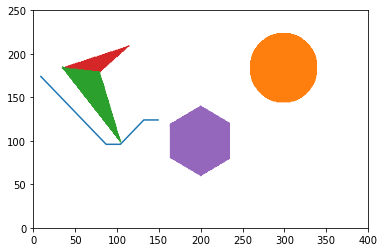

In [24]:
if (map_obs4[goal_location[0], goal_location[1]]!=-1 and map_obs4[goal_location[0], goal_location[1]]!=-2 ):
    x_a = []
    y_a = []
    backtrack(All_list, x_a, y_a)
    mp.show()
    mp.axis([0, 400, 0, 250])
    mp.plot(y_a,x_a)
    mp.plot(x_nc, y_nc)
    mp.plot(x_t1_nc,y_t1_nc)
    mp.plot(x_t2_nc,y_t2_nc)
    mp.plot(x_h_nc,y_h_nc)
else:
    print('cannot be back tracked')

Priority queueu has a problem with objects (try any other method): check once

Put animation here

In [25]:
len(listofallpointsformap)

15013

In [26]:
import pygame
import cv2
import numpy as np
#defining a blank canvas
new_canvas = np.zeros((250,400,3),np.uint8)
# listofallpointsformap = [] 
#for every point that belongs within the obstacle
# listofallpointsformap.append([y_nc,x_nc])
# listofallpointsformap.append([y_h_nc, x_h_nc]) 
# listofallpointsformap.append([y_t1_nc, x_t1_nc]) 
# listofallpointsformap.append[y_t2_nc, x_t2_nc]

for c in listofallpointsformap: #change the name of the variable l
    x = c[0]
    y = c[1]
    new_canvas[(y,x)]=[0,255,255] #assigning a yellow coloured pixel
#flipping the image for correct orientation
new_canvas = np.flipud(new_canvas)
#making a copy for backtracking purpose
new_canvas_copy_backtrack = new_canvas.copy()
#making a copy for showing the visited nodes on the obstacle space
#can be used for the animation
new_canvas_copy_visited = new_canvas.copy()
new_canvas_copy_visited = cv2.resize(new_canvas_copy_visited,(600,400))
#showing the obstacle map
cv2.imshow('new_canvas',new_canvas)
cv2.waitKey(0)
cv2.destroyAllWindows()


pygame 2.1.2 (SDL 2.0.16, Python 3.7.11)
Hello from the pygame community. https://www.pygame.org/contribute.html


In [ ]:




# pygame.init()

# display_width = 300
# display_height = 200

# gameDisplay = pygame.display.set_mode((display_width,display_height),pygame.FULLSCREEN)
# pygame.display.set_caption('Covered Nodes- Animation')

# black = (0,0,0)
# white = (0,255,255)
# #new = np.array(new_canvas_copy_visited)
# surf = pygame.surfarray.make_surface(new_canvas_copy_visited)

# clock = pygame.time.Clock()
# done = False
# while not done:
#     for event in pygame.event.get():   
#         if event.type == pygame.QUIT:  
#             done = True   
 
#     gameDisplay.fill(black)
#     for path in visited:
#         if path not in new_canvas_copy_visited:
#             #pygame.time.wait(1)
#             #time.sleep(0.000005)
#             x = path[0]
#             y = abs(200-path[1])
#             #gameDisplay.blit(surf, (x,y))
#             #gameDisplay.fill(white)
#             pygame.draw.rect(gameDisplay, white, [x,y,1,1])
#             #pygame.time.wait(1)
#             pygame.display.flip()
#     for path in backtracked_final:
        
#         pygame.time.wait(5)
#         #time.sleep(0.00005)
#         x = path[0]
#         y = abs(200-path[1])
#         #gameDisplay.blit(surf, (x,y))
#         #gameDisplay.fill(white)
#         pygame.draw.rect(gameDisplay, (0,0,255), [x,y,1,1])
#         #pygame.time.wait(1)
#         pygame.display.flip()
        
#     #pygame.time.wait(14)
#     done = True
# pygame.quit()


# # In[ ]:


# #visited path
# for path in visited:
#     #print(path)
#     x = path[0]
#     y = path[1]
#     new_canvas_copy_backtrack[(200-y,x)]=[255,0,0] #setting every backtracked pixel to white
# #showing the final backtracked path
# new_backtracked = cv2.resize(new_canvas_copy_backtrack,(600,400))
# cv2.imshow('visited',new_backtracked)
# cv2.waitKey(0)
# cv2.destroyAllWindows()


# # In[ ]:


# #backtracked path
# for path in backtracked_final:
#     x = path[0]
#     y = path[1]
#     new_canvas_copy_backtrack[(200-y,x)]=[0,255,0] #setting every backtracked pixel to green
# #showing the final backtracked path
# new_backtracked = cv2.resize(new_canvas_copy_backtrack,(600,400))
# cv2.imshow('new_backtracked',new_backtracked)
# cv2.waitKey(0)
# cv2.destroyAllWindows()